<a href="https://colab.research.google.com/github/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-29/blob/main/SVM_Equipo29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Eduardo Gabriel Arévalo Aguilar - A01793897
*   José Javier Granados Hernández - A00566717
*   Ernesto Enriquez Rubio - A01228409
*   Roberto Romero Vielma - A00822314  


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [318]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay   
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn import svm

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import train_test_split



import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil, log

#**Ejercicio-1.** 
Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y 
validación. Usa un random_state=0. 

In [2]:
code_names=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"]
catColumns = ['A'+str(x) for x in [4,5,6,12]]
contColumns = ['A'+str(x) for x in [2,3,7,10,13,14]]
binColumns = ['A'+str(x) for x in [1,8,9,11]]

In [3]:
credit=pd.read_table("https://raw.githubusercontent.com/rromerov/Machine-Learning-Projects/main/australian.dat",sep=" ",header=0,names=code_names)

In [4]:
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1


In [5]:
X=credit.iloc[:,:-1:]
y=credit.iloc[:,-1]

In [6]:
X_tv,X_test,y_tv,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

#**Ejercicio-2.**
Hacer un análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. 
Utiliza un Pipeline para evitar el filtrado de información.  

In [7]:
credit.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [8]:
credit.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.677794,31.581974,4.748999,1.766328,7.377358,4.693759,2.224332,0.523948,0.428157,2.403483,0.457184,1.928882,184.136430,1018.103048,0.445573
std,0.467661,11.856359,4.975215,0.430283,3.683694,1.993588,3.348856,0.499789,0.495171,4.865611,0.498525,0.299018,172.254524,5213.882348,0.497390
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.000000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.670000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.750000,7.080000,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.000000,1.000000,2.000000,272.000000,395.000000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [9]:
credit.dtypes

A1       int64
A2     float64
A3     float64
A4       int64
A5       int64
A6       int64
A7     float64
A8       int64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14      int64
A15      int64
dtype: object

In [10]:
for col in credit.columns:
  print('{0:4}, {1:7.3f}, {2:10.3f}'.format(col, credit[col].quantile(0.75), credit[col].max()))

A1  ,   1.000,      1.000
A2  ,  37.750,     80.250
A3  ,   7.080,     28.000
A4  ,   2.000,      3.000
A5  ,  10.000,     14.000
A6  ,   5.000,      9.000
A7  ,   2.625,     28.500
A8  ,   1.000,      1.000
A9  ,   1.000,      1.000
A10 ,   3.000,     67.000
A11 ,   1.000,      1.000
A12 ,   2.000,      3.000
A13 , 272.000,   2000.000
A14 , 395.000, 100001.000
A15 ,   1.000,      1.000


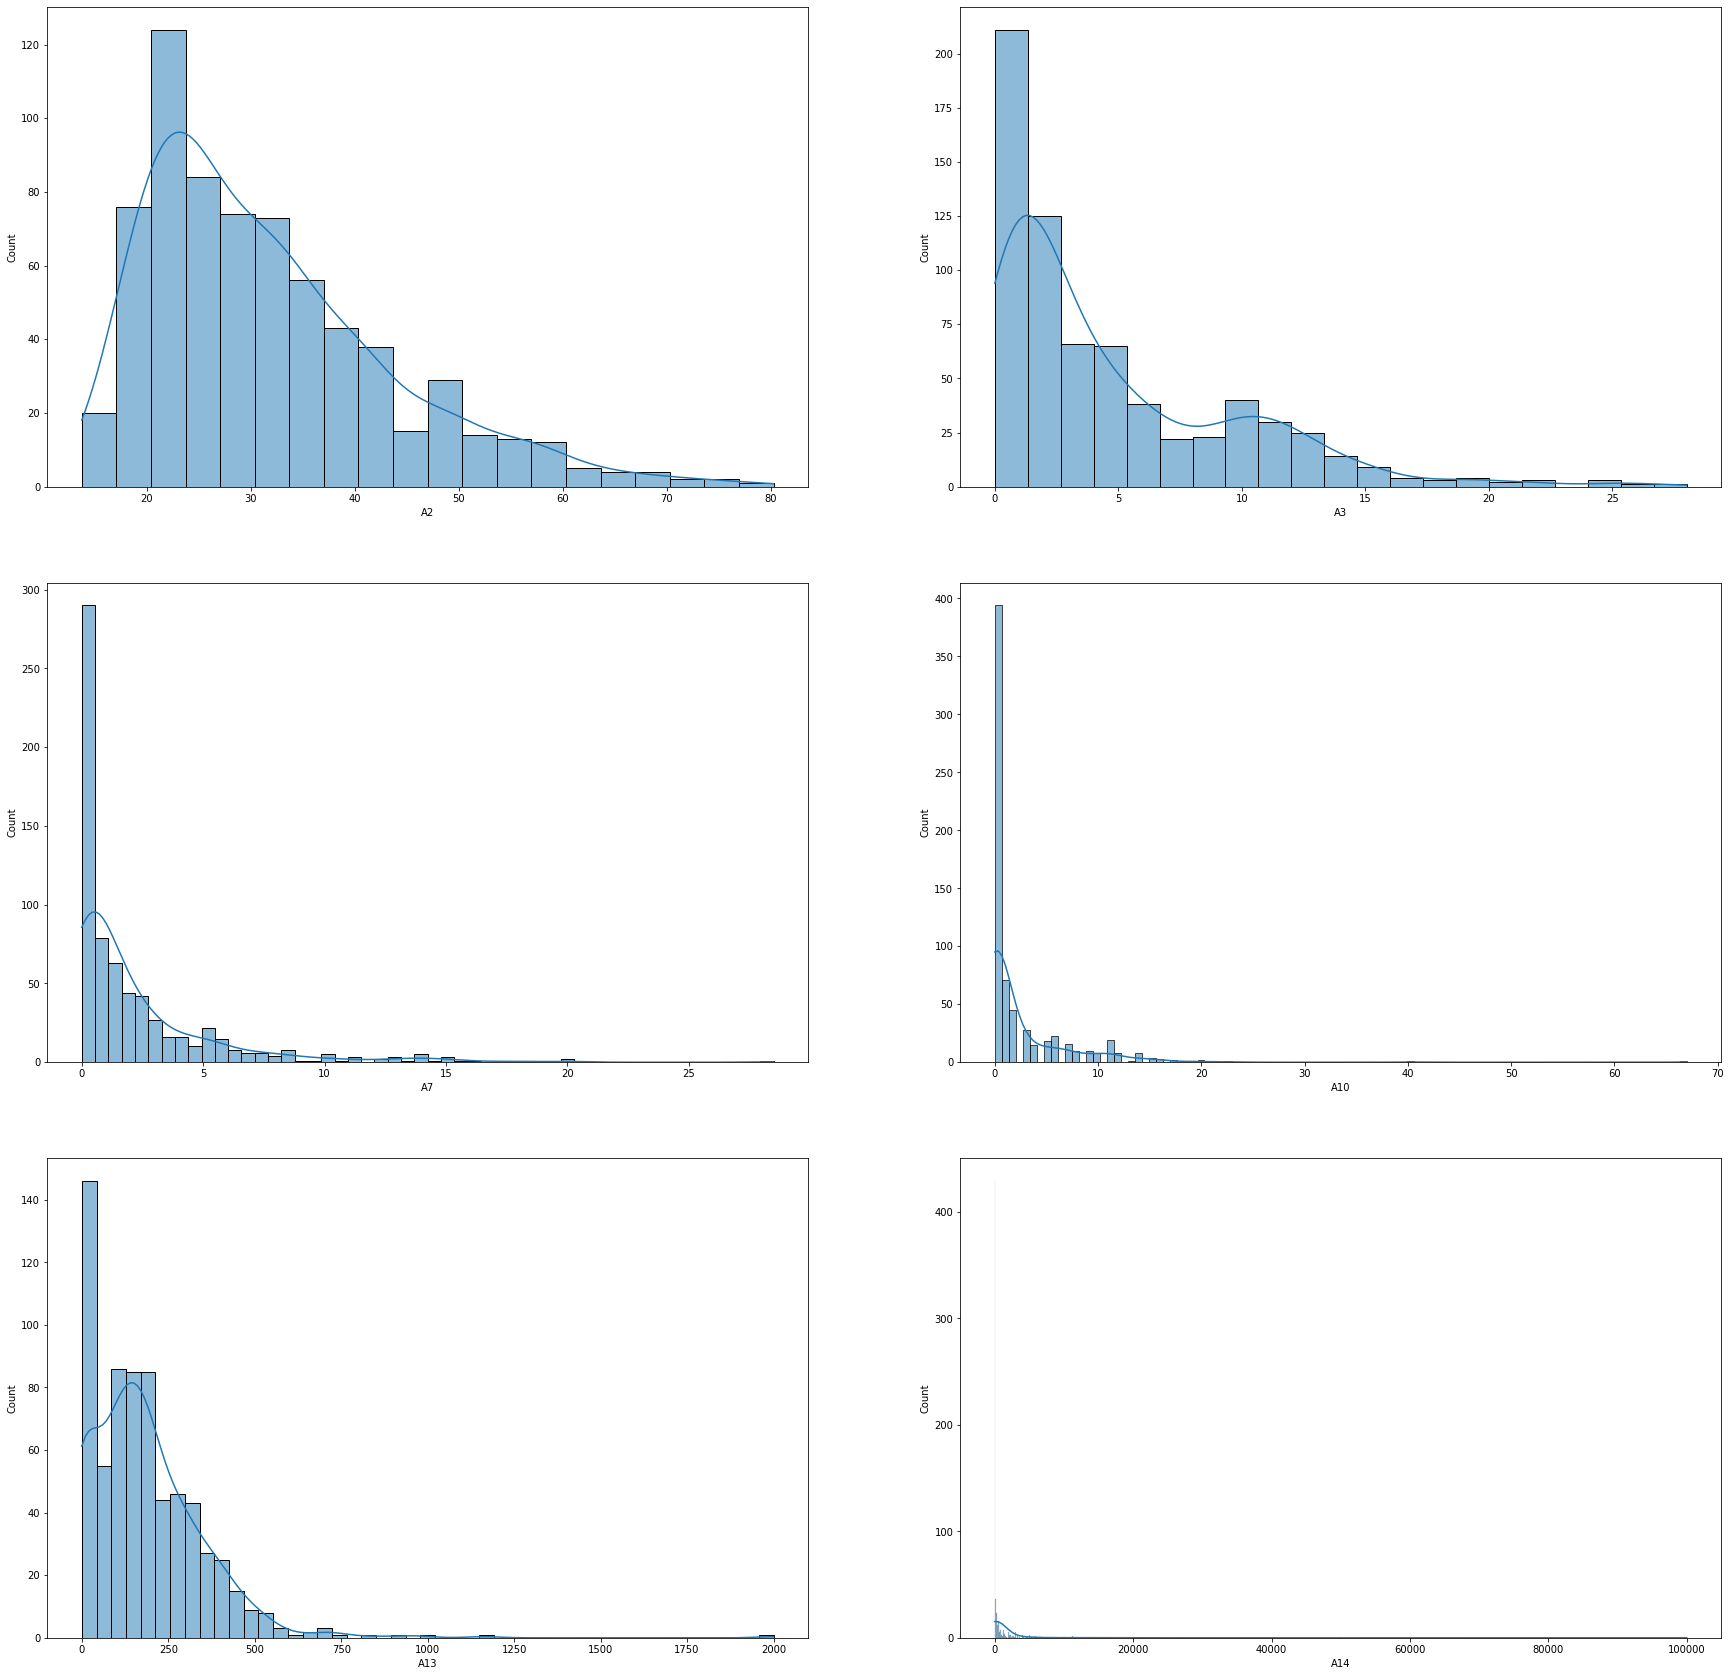

In [11]:
numPlots = len(contColumns)
columnLen = 3
rowLen = numPlots//columnLen 
fig, axes = plt.subplots(columnLen, rowLen,figsize=(30, 30))
for col, ax in zip(contColumns, axes.flat):
  # ax.set_ylim(0,credit[code_names[i]].value_counts().max())
  sns.histplot(x=col,data=credit,ax=ax, kde=True)
plt.show()

100001 1
15013.960000000001 7


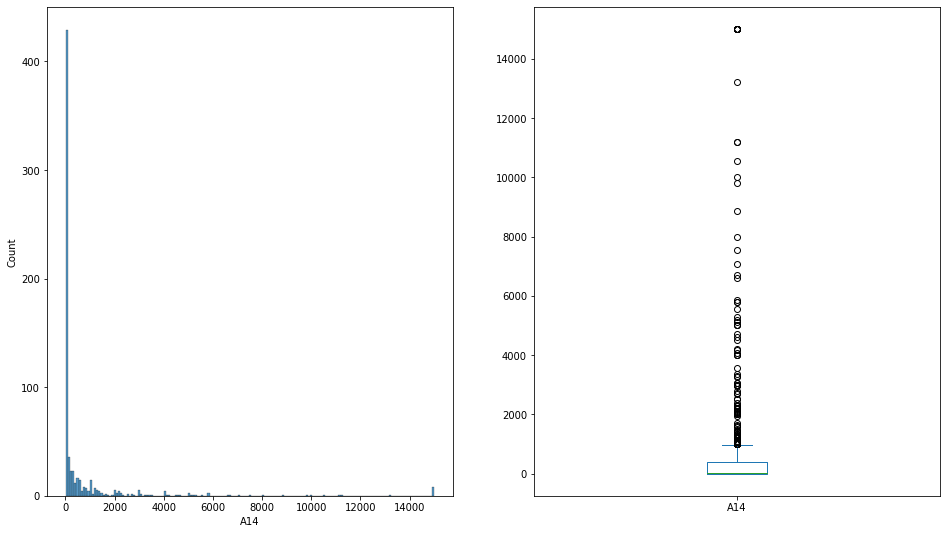

4124.800000000002 35


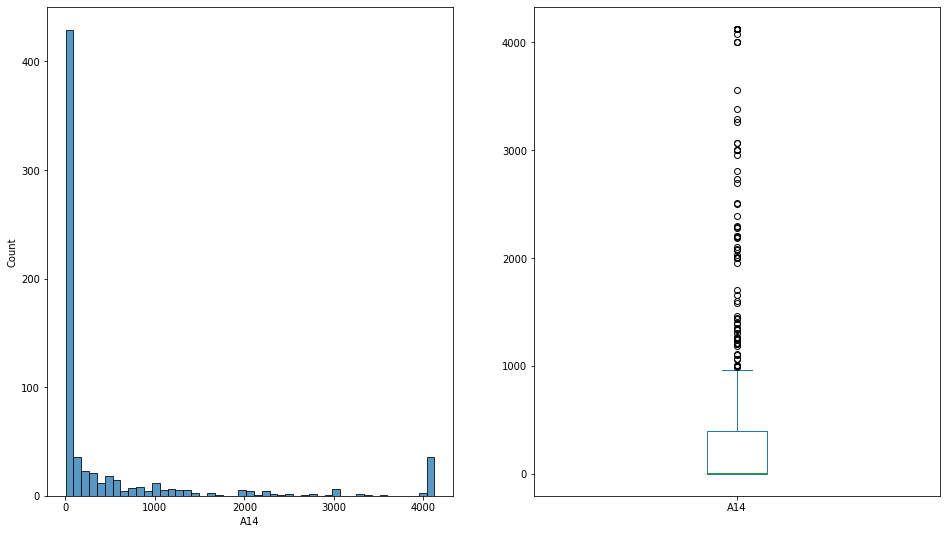

2001.0 71


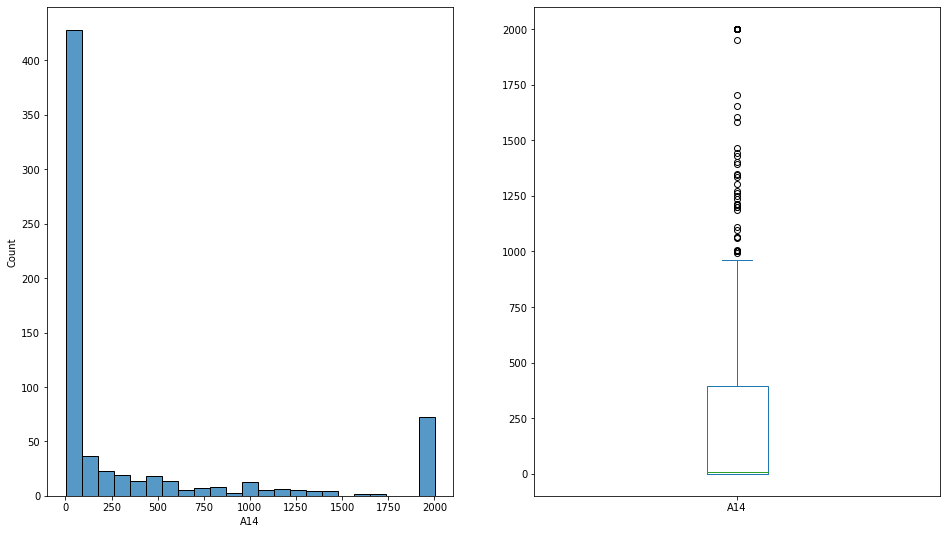

In [12]:
# La variable 15 tiene variables fuera de proporción. Se pueden apreciar dos alternativas, crear el modelo con esos datos o aplicar un tope a la distribución.
print(credit['A14'].max(), credit['A14'].min())
for clp in [0.99, 0.95, 0.90]:
  fix, ax = plt.subplots(1,2, figsize=(16,9))
  tempS = credit['A14'].clip(lower=credit['A14'].quantile(0.00), upper=credit['A14'].quantile(clp))
  print(tempS.max(), sum(credit['A14'] >= tempS.max()))
  sns.histplot(tempS, ax=ax[0])
  tempS.plot(kind='box', ax=ax[1])
  plt.show()

In [13]:
# Continuous formatted columns -> contColumns
numeric_pipeline = Pipeline(
    steps=[("Mednum", SimpleImputer(strategy="median")), ("MinMax",MinMaxScaler(feature_range=(1,2)))])


# Categorical formatted columns -> catColumns
categorical_pipeline=Pipeline(
    steps=[("Modacat", SimpleImputer(strategy="most_frequent")),("OHEcat",OneHotEncoder(handle_unknown="ignore"))]
)

# Binary formatted columns -> binColumns 
binary_features=["A1","A8","A9","A11"]
binary_pipeline=Pipeline(
    steps=[("Modabi",SimpleImputer(strategy="most_frequent"))]
)       

columnasTransformer = ColumnTransformer(transformers = [('numpipe', numeric_pipeline, contColumns),
                                                        ('catpipe', categorical_pipeline, catColumns),
                                                        ('binpipe', binary_pipeline, binColumns)])

<font color="royalblue">
Para las variables numéricas usamos la imputación por medio de la mediana de los datos, seguido de una transformación Min-Max para que todas las features queden dentro del mismo rango y no exista una que tenga mayor peso que las otras, para las variables categóricas se optó por la moda para llenar los valores faltantes y se usó la transformación One-Hot Encoder para convertir las categorías en un formato más fácil de entender para nuestro modelo, por último a las variables binarias se les hizo una imputación simple con moda y no se realizó ninguna transformación, dado que las variables binarias ya están en un formato fácil de leer para los modelos predictivos. </font>

#**Ejercicio-3.**
Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto 
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las 
siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar 
la estrategia “stratified” en este caso? 

In [14]:
def mi_accuracy(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  accuracy=(VN+VP)/(VN+FP+FN+VP)
  return accuracy

def mi_precision(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  precision=(VP)/(VP+FP)
  return precision

def mi_recall(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  recall=(VP)/(VP+FN)
  return recall

def mi_f1_score(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  recall=(VP)/(VP+FN)
  precision=(VP)/(VP+FP)
  f1_score=(2*recall*precision)/(precision+recall)
  return f1_score

In [309]:
dummy_clf = DummyClassifier(strategy="stratified")
pipeline = Pipeline(steps=[('columntrans',columnasTransformer),('model',dummy_clf)])
pipeline.fit(X_tv, y_tv)  

# accuracy-rrores del Train:

print("Entrenamiento")
train_yhat = pipeline.predict(X_tv)
train_accuracy = mi_accuracy(y_tv, train_yhat)          
print("accuracy:",train_accuracy)

# f1_score-errores del Train:
train_yhat = pipeline.predict(X_tv)
train_f1_score = mi_f1_score(y_tv, train_yhat)          
print("f1_score: ",train_f1_score)

# precision-errores del Train:
train_yhat = pipeline.predict(X_tv)
train_precision = mi_precision(y_tv, train_yhat)          
print("precision:",train_precision) 

# recall-errores del Train:
train_yhat = pipeline.predict(X_tv)
train_recall = mi_recall(y_tv, train_yhat)          
print("recall:  ",train_recall) 


Entrenamiento
accuracy: 0.5418803418803418
f1_score:  0.4261682242990655
precision: 0.46303501945525294
recall:   0.4344569288389513


<font color="royalblue">Se utiliza la estrategia **Stratified** principalmente porque conserva la proporción de probabilidad de cada uno de los vectores de entrada. De modo que tenemos una mejor representación  para predecir nuestra variable de salida. <font> 

#**Ejercicio-4.**
Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros  
con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio 
anterior.  

In [16]:
modelSVC = svm.SVC()
dataModelPipe = Pipeline( steps=[
    ('colTransformer', columnasTransformer),
    ('svmModel', modelSVC)
])
dmKFold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1) 
mismetricas = {"accuracy":make_scorer(mi_accuracy),"precision":make_scorer(mi_precision),"recall":make_scorer(mi_recall),"f1-score":make_scorer(mi_f1_score)}

#Gridsearch setup
parameterGrid = {'svmModel__kernel':['linear', 'poly','sigmoid'],
                 'svmModel__degree':[2,3,4],
                 'svmModel__gamma':['scale'],
                 'svmModel__coef0':[0,0.1, 0.5],
                 'svmModel__random_state':[42]
                 }


In [223]:
dictSeriesScores = {}

for score in mismetricas.keys():

  # Train the model based on the score refit

  gridSVC = GridSearchCV(estimator=dataModelPipe,

                       param_grid=parameterGrid,

                      #  scoring = make_scorer(mi_accuracy),

                       scoring=mismetricas,

                       cv = dmKFold,

                       refit=score,

                       n_jobs=-1,

                       return_train_score=True

  )

  gridSVC.fit(X_tv,np.ravel(y_tv))

  print("                             ")


  print(f'Refit using {score}:'+'*'*10)

  print("                             ")

  print("El mejor resultado es:",gridSVC.best_score_)

  print("Los mejores parámetros son:")

  for _ in gridSVC.best_params_: print(_, gridSVC.best_params_.get(_))

  # Save data from each score used for refiut

  scoresDict = {

    'accuracyTestMean':gridSVC.cv_results_.get('mean_test_accuracy'),

    'accuracyTrainMean':gridSVC.cv_results_.get('mean_train_accuracy'),

    'precisionTestMean':gridSVC.cv_results_.get('mean_test_precision'),

    'precisionTrainMean':gridSVC.cv_results_.get('mean_train_precision'),

    'recallTestMean':gridSVC.cv_results_.get('mean_test_recall'),

    'recallTrainMean':gridSVC.cv_results_.get('mean_train_recall'),

    'f1TestMean':gridSVC.cv_results_.get('mean_test_f1-score'),

    'f1TrainMean':gridSVC.cv_results_.get('mean_train_f1-score'),

  }

  dictSeriesScores[score] = scoresDict

                             
Refit using accuracy:**********
                             
El mejor resultado es: 0.8626780626780629
Los mejores parámetros son:
svmModel__coef0 0.1
svmModel__degree 4
svmModel__gamma scale
svmModel__kernel poly
svmModel__random_state 42
                             
Refit using precision:**********
                             
El mejor resultado es: 0.840611869622038
Los mejores parámetros son:
svmModel__coef0 0.5
svmModel__degree 4
svmModel__gamma scale
svmModel__kernel poly
svmModel__random_state 42
                             
Refit using recall:**********
                             
El mejor resultado es: 0.9186888231726286
Los mejores parámetros son:
svmModel__coef0 0.5
svmModel__degree 2
svmModel__gamma scale
svmModel__kernel poly
svmModel__random_state 42
                             
Refit using f1_score:**********
                             
El mejor resultado es: 0.8506965317665555
Los mejores parámetros son:
svmModel__coef0 0.1
svmMode

In [18]:
def get_models():
  modelos = list()
  nombres = list()

  # SVM Accuracy
  modelos.append(svm.SVC(kernel= "poly",
                 degree= 4,
                 gamma= "scale",
                 coef0= 0.1,
                 random_state=42))
  nombres.append('SVM Accuracy')

    # SVM Precision
  modelos.append(svm.SVC(kernel= "poly" ,
                 degree= 4,
                 gamma= "scale",
                 coef0= 0.5,
                 random_state=42))
  nombres.append('SVM Precision')

    # SVM Recall
  modelos.append(svm.SVC(kernel="poly" ,
                 degree= 2,
                 gamma= "scale",
                 coef0=0.5,
                 random_state=42))
  nombres.append('SVM Recall')

    # SVM F1-Score
  modelos.append(svm.SVC(kernel= "poly" ,
                 degree= 4,
                 gamma= "scale",
                 coef0=0.1,
                 random_state=42))
  nombres.append('SVM F1-Score')




  return modelos, nombres

In [19]:
modelos, nombres = get_models()  
resultadosLDR = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  mismetricas={"accuracy":make_scorer(mi_accuracy),"precision":make_scorer(mi_precision),"recall":make_scorer(mi_recall),"f1_score":make_scorer(mi_f1_score)}
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
  resultados = cross_validate(pipeline, X_tv, y_tv, scoring=mismetricas, cv=kfold, error_score="raise",return_train_score=True)
  resultadosLDR.append(resultados)  
  print("Prueba \n") 

  mean_models=[resultados['test_accuracy'],resultados['test_recall'],resultados['test_precision'],resultados['test_f1_score']]
  print(np.mean(mean_models))
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precission: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-Score: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados['test_accuracy']),
                                                                          np.std(resultados['test_accuracy']), 
                                                                          np.mean(resultados['test_precision']),
                                                                          np.std(resultados['test_precision']),
                                                                          np.mean(resultados['test_recall']),
                                                                          np.std(resultados['test_recall']), 
                                                                          np.mean(resultados['test_f1_score']),
                                                                          np.std(resultados['test_f1_score']),                                                                                                                                                    
                                                                          ))
  print("Entrenamiento \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precission: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-Score: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultados['train_accuracy']), np.std(resultados['train_accuracy']),  
                                                                          np.mean(resultados['train_precision']), np.std(resultados['train_precision']), 
                                                                          np.mean(resultados['train_recall']), np.std(resultados['train_recall']),
                                                                          np.mean(resultados['train_f1_score']), np.std(resultados['train_f1_score'])))

Prueba 

0.8502499561457552
SVM Accuracy:
mean Accuracy: 0.859 (0.0302)
mean Precission: 0.841 (0.0442)
mean Recall: 0.855 (0.0550)
mean F1-Score: 0.846 (0.0347)

Entrenamiento 

SVM Accuracy:
mean Accuracy: 0.927 (0.0078)
mean Precission: 0.912 (0.0120)
mean Recall: 0.929 (0.0110)
mean F1-Score: 0.921 (0.0084)

Prueba 

0.8467898854669007
SVM Precision:
mean Accuracy: 0.856 (0.0293)
mean Precission: 0.839 (0.0392)
mean Recall: 0.850 (0.0573)
mean F1-Score: 0.843 (0.0348)

Entrenamiento 

SVM Precision:
mean Accuracy: 0.937 (0.0062)
mean Precission: 0.923 (0.0089)
mean Recall: 0.941 (0.0090)
mean F1-Score: 0.932 (0.0068)

Prueba 

0.848516137217853
SVM Recall:
mean Accuracy: 0.847 (0.0327)
mean Precission: 0.789 (0.0421)
mean Recall: 0.913 (0.0472)
mean F1-Score: 0.845 (0.0321)

Entrenamiento 

SVM Recall:
mean Accuracy: 0.857 (0.0102)
mean Precission: 0.795 (0.0148)
mean Recall: 0.926 (0.0089)
mean F1-Score: 0.855 (0.0093)

Prueba 

0.8502499561457552
SVM F1-Score:
mean Accuracy: 0.85

#**Ejercicio-5.**
Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. 
Incluye tus conclusiones. 

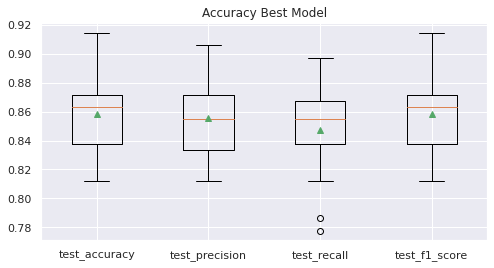

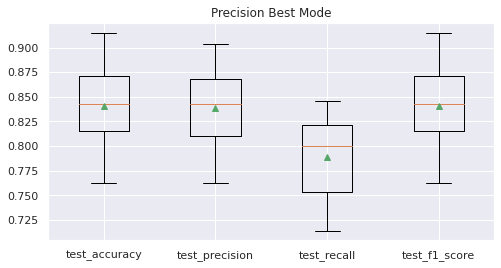

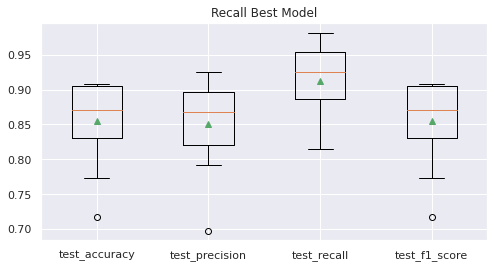

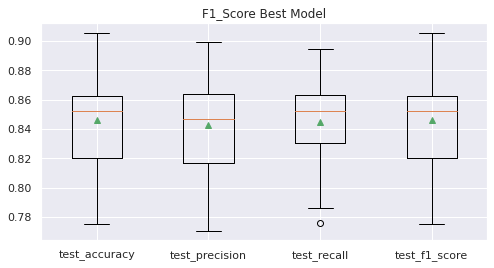

In [306]:
sns.set(rc={'figure.figsize':(8,4)})

bestMTitles = ['Accuracy Best Model',"Precision Best Mode","Recall Best Model",
               "F1_Score Best Model"]
metrics=['test_accuracy',"test_precision","test_recall","test_f1_score"]


for m, title in zip(metrics, bestMTitles):
    bpMape = list()
    for i in range(len(resultadosLDR)):
      rr = resultadosLDR[i][m]
      bpMape.append(np.abs(rr))
    plt.title(title)
    plt.boxplot(bpMape, labels=metrics, showmeans=True)
    plt.show()


<font color="royalblue">Podemos concluir que el mejor modelo de Accuracy y el de F1-Score dan el mismo resultado en el score, teniendo ambos un resultado de 0.8502499561457552, dado que el GridSearch arrojó los mismos hipeparámetros en ambos modelos y que el modelo con mejor Precision da el score más bajo de 0.8467898854669007, los boxplot se encuentran dentro del rango del 0.70 al 0.90 en el eje Y. </font>


#**Ejercicio-6.**
Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de 
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, 
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno 
de estos problemas. 

In [22]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def mi_ModeloYCurvas(Xin):

  bestSVCModel = svm.SVC(
      kernel= gridSVC.best_params_.get('svmModel__kernel'),
      degree = gridSVC.best_params_.get('svmModel__degree'),
      gamma = gridSVC.best_params_.get('svmModel__gamma'),
      random_state= gridSVC.best_params_.get('svmModel__random_state'),
      coef0=gridSVC.best_params_.get('svmModel__coef0')
  )

  mi_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

  mi_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=7)
  
  delta_train_sz = np.linspace(0.1,1.0,40)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                  X = Xin,
                                                  y = y_tv,
                                                  cv = mi_kfold ,
                                                  train_sizes = delta_train_sz ,
                                                  scoring=make_scorer(mi_accuracy),
                                                  random_state=10)
       
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo de SVC con mejor accuracy:


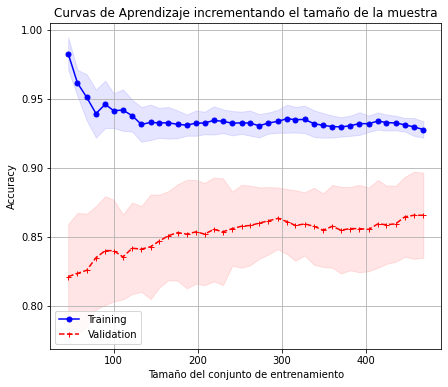

In [23]:
print('Curvas de aprendizaje del modelo de SVC con mejor accuracy:')
mi_ModeloYCurvas(X_tv)

<font color="royalblue">
El modelo no se encuentra sobreentrenado, tampoco está subentrenado, dado que la diferecia de la varianza entre ambas es mínima (entre 0.5 a menos de 0.1).
</font>

Creamos una función para graficar con los demás modelos

In [24]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,metric_name):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(metric_name)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def mi_ModeloYCurvasScorer(Xin,kernel,degree,gamma,coef0,metric,metric_name):

  bestSVCModel = svm.SVC(
      kernel= kernel,
      degree = degree,
      gamma = gamma,
      coef0=coef0,
      random_state= 42,
  )

  mi_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

  mi_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=7)
  
  delta_train_sz = np.linspace(0.1,1.0,40)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                  X = Xin,
                                                  y = y_tv,
                                                  cv = mi_kfold ,
                                                  train_sizes = delta_train_sz ,
                                                  scoring=make_scorer(metric),
                                                  random_state=10)
       
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,metric_name)

Curvas de aprendizaje del modelo de SVC con mejor precision:


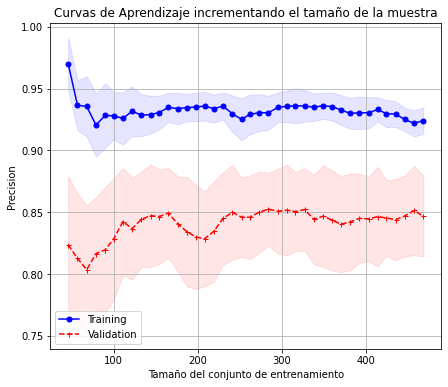

In [25]:
print('Curvas de aprendizaje del modelo de SVC con mejor precision:')
mi_ModeloYCurvasScorer(X_tv,"poly",4,"scale",0.5,mi_precision,"Precision")

<font color="royalblue">
El modelo no se encuentra sobreentrenado, tampoco está subentrenado, dado que la diferecia de la varianza entre ambas es mínima (entre 0.5 a menos de 0.1).
</font>

Curvas de aprendizaje del modelo de SVC con mejor recall:


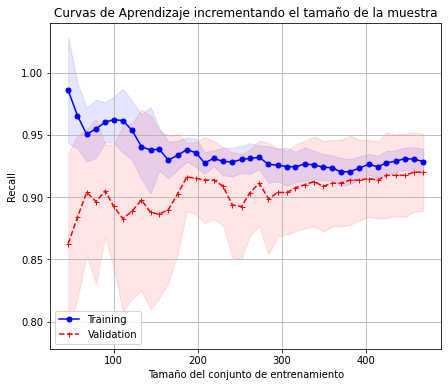

In [26]:
print('Curvas de aprendizaje del modelo de SVC con mejor recall:')
mi_ModeloYCurvasScorer(X_tv,"poly",2,"scale",0.5,mi_recall,"Recall")

<font color="royalblue">
Los conjuntos de entrenamiento y de validación tienden a parecerse más a medida que se incrementa el tamaño de la muestra, lo que da a entender que el modelo no se encuentra sobreentrenado, ni subentrenado.
</font>

Curvas de aprendizaje del modelo de SVC con mejor F1-Score:


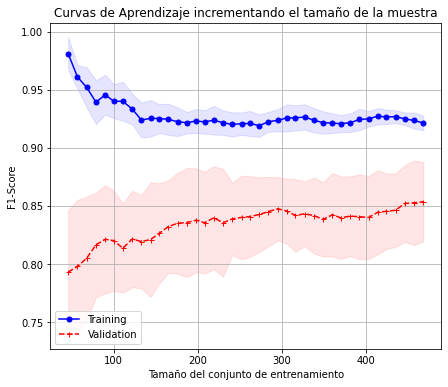

In [27]:
print('Curvas de aprendizaje del modelo de SVC con mejor F1-Score:')
mi_ModeloYCurvasScorer(X_tv,"poly",4,"scale",0.1,mi_f1_score,"F1-Score")

<font color="royalblue">
El modelo no se encuentra sobreentrenado, tampoco está subentrenado, dado que la diferecia de la varianza entre ambas es mínima (entre 0.5 a menos de 0.1).
</font>

#**Ejercicio-7.**
Con los mejores hiperparámetros encontrados encontrar la gráfica de la curva ROC y su área bajo la 
curva. 

Modelo con mejor accuracy


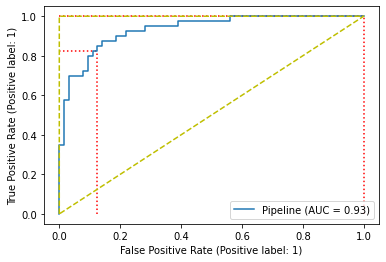

In [28]:
bestSVCModel = svm.SVC(
    kernel= gridSVC.best_params_.get('svmModel__kernel'),
    degree = gridSVC.best_params_.get('svmModel__degree'),
    gamma = gridSVC.best_params_.get('svmModel__gamma'),
    coef0=gridSVC.best_params_.get('svmModel__coef0'),
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])
best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)

metrics.RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')
print("Modelo con mejor accuracy")
plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
plt.show() 


Función para graficar Curva ROC de Precision, Recall y F1-Score

In [29]:
def bestMetricSVC(kernel,degree,gamma,coef0):
  bestSVCModel = svm.SVC(
      kernel= kernel,
      degree = degree,
      gamma = gamma,
      coef0=coef0,
      random_state= gridSVC.best_params_.get('svmModel__random_state'), #este lo dejamos así porque todos usan el mismo random state
  )

  best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])
  best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
  yhat=best_SVC_pipe.predict(X_test)

  fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)

  metrics.RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)

  plt.plot([0,0,1,0],[0,1,1,0], 'y--')

  plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
  plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
  plt.show() 

Modelo con mejor precision


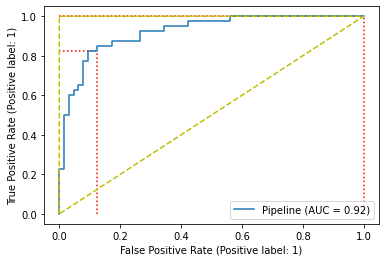

In [30]:
print("Modelo con mejor precision")
bestMetricSVC("poly",4,"scale",0.5)

Modelo con mejor recall


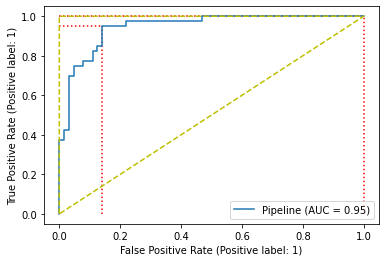

In [31]:
print("Modelo con mejor recall")
bestMetricSVC("poly",2,"scale",0.5)

Modelo con mejor f1-score


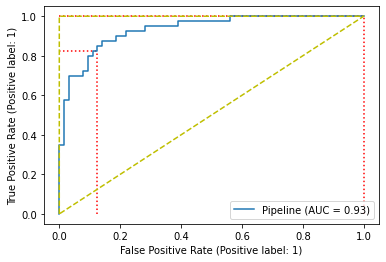

In [32]:
print("Modelo con mejor f1-score")
bestMetricSVC("poly",4,"scale",0.1)

#**Ejercicio-8.**
Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica 
f1-score. 

Modelo con el mejor score en accuracy

In [69]:
bestSVCModel = svm.SVC(
    kernel= gridSVC.best_params_.get('svmModel__kernel'),
    degree = gridSVC.best_params_.get('svmModel__degree'),
    gamma = gridSVC.best_params_.get('svmModel__gamma'),
    coef0=gridSVC.best_params_.get('svmModel__coef0'),
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
    probability=True
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

score=mi_f1_score(y_test,yhat)
print('F-Score con umbral de 0.5 en el mejor modelo de accuracy: %.5f' % score)

F-Score con umbral de 0.5 en el mejor modelo de accuracy: 0.81481


In [68]:
yhat = best_SVC_pipe.predict_proba(X_test) #obtenemos las probabilidades de cada clase

probs = yhat[:, 1] #seleccionamos la clase 1

thresholds = np.arange(0, 1, 0.01) #creamos un arreglo que vaya de 0 a 1 con paso de 0.01

def to_labels(pos_probs, threshold): #aplicar el umbral a las probabilidades de 1 y de esa manera crear etiquetas
  return (pos_probs >= threshold).astype('int')

scores = [mi_f1_score(y_test, to_labels(probs, t)) for t in thresholds] #guardamos los resultados en el score

ix = np.argmax(scores) #obtenemos el F-score mas alto
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

def fun_thTPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)   # shape (231x2)
  y = pd.DataFrame(y)
  my1s = (y["A15"]==1) 
  pred1s  = p[my1s][:,1]
  return sum(pred1s > th) / sum(my1s)

def fun_thFPrate(th, modelo, x, y):
  y = pd.DataFrame(y)   
  p = modelo.predict_proba(x)
  my0s = (y["A15"]==0) 
  pred0s  = p[my0s][:,1]
  return sum(pred0s>th) / sum(my0s)

Threshold=0.300, F-Score=0.83333


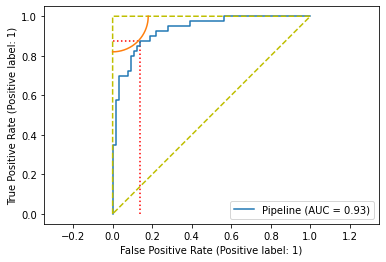

In [70]:
new_th = 0.3 # búsqueda del mejor umbral que minimiza el total FP+FN.
rr = 0.18   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVC_pipe, X_test, y_test)
new_FPrate = fun_thFPrate(new_th, best_SVC_pipe, X_test, y_test)

RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de círculo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

In [71]:
pred_pr = best_SVC_pipe.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = best_SVC_pipe.predict(X_test)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[56  8]
 [ 7 33]]

Predicciones con un mejor umbral de 0.30:
[[55  9]
 [ 5 35]]


Para visualizar de mejor manera los resultados definimos una función para graficar la matriz de confusión.

In [72]:
def mi_cm(yreal, ypred):
  cm=confusion_matrix(yreal, ypred)
  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

Umbral de 0.5


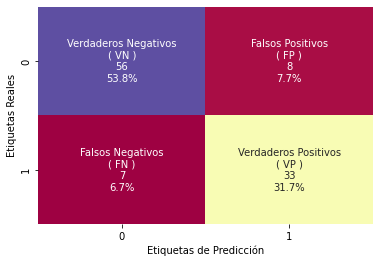

In [73]:
print("Umbral de 0.5")
mi_cm(y_test,pred_bin_05)

Mejor umbral de 0.3


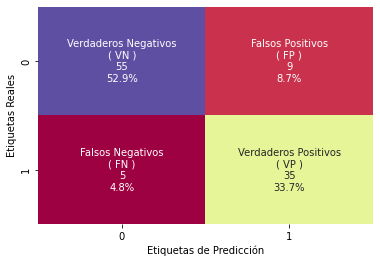

In [74]:
print("Mejor umbral de",new_th)
mi_cm(y_test,pred_bin_newTh)

Modelo con el mejor score en precision

In [76]:
bestSVCModel = svm.SVC(
    kernel= "poly",
    degree = 4,
    gamma = "scale",
    coef0=0.5,
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
    probability=True
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

score=mi_f1_score(y_test,yhat)
print('F-Score con umbral de 0.5 en el mejor modelo de precision: %.5f' % score)

F-Score con umbral de 0.5 en el mejor modelo de precision: 0.81481


In [77]:
yhat = best_SVC_pipe.predict_proba(X_test)

probs = yhat[:, 1]

thresholds = np.arange(0, 1, 0.01)

scores = [mi_f1_score(y_test, to_labels(probs, t)) for t in thresholds]

ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.650, F-Score=0.83544


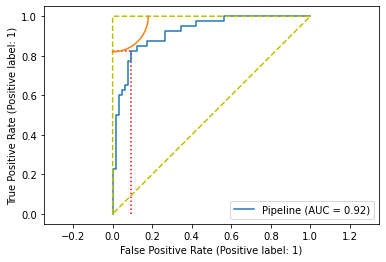

In [79]:
new_th = 0.65 # búsqueda del mejor umbral que minimiza el total FP+FN.
rr = 0.18   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVC_pipe, X_test, y_test)
new_FPrate = fun_thFPrate(new_th, best_SVC_pipe, X_test, y_test)

RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

In [80]:
pred_pr = best_SVC_pipe.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = best_SVC_pipe.predict(X_test)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[56  8]
 [ 7 33]]

Predicciones con un mejor umbral de 0.65:
[[58  6]
 [ 7 33]]


Umbral de 0.5


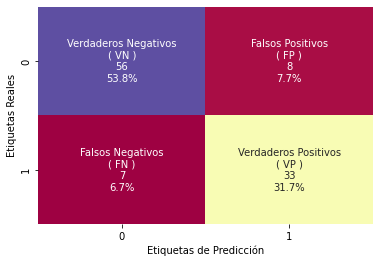

In [81]:
print("Umbral de 0.5")
mi_cm(y_test,pred_bin_05)

Mejor umbral de 0.65


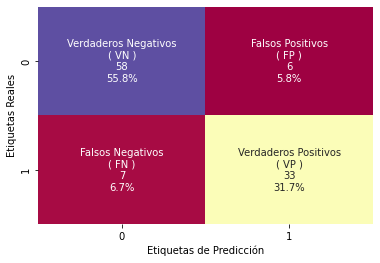

In [82]:
print("Mejor umbral de",new_th)
mi_cm(y_test,pred_bin_newTh)

Modelo con el mejor score en recall

In [224]:
bestSVCModel = svm.SVC(
    kernel= "poly",
    degree = 2,
    gamma = "scale",
    coef0=0.5,
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
    probability=True
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

score=mi_f1_score(y_test,yhat)
print('F-Score con umbral de 0.5 en el mejor modelo de recall: %.5f' % score)

F-Score con umbral de 0.5 en el mejor modelo de recall: 0.87356


In [225]:
yhat = best_SVC_pipe.predict_proba(X_test)

probs = yhat[:, 1]

thresholds = np.arange(0, 1, 0.1)

scores = [mi_f1_score(y_test, to_labels(probs, t)) for t in thresholds]

ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.200, F-Score=0.87356


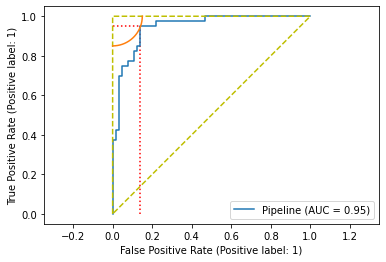

In [226]:
new_th = 0.2 # búsqueda del mejor umbral que minimiza el total FP+FN.
rr = 0.15   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVC_pipe, X_test, y_test)
new_FPrate = fun_thFPrate(new_th, best_SVC_pipe, X_test, y_test)

RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

In [227]:
pred_pr = best_SVC_pipe.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = best_SVC_pipe.predict(X_test)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[55  9]
 [ 2 38]]

Predicciones con un mejor umbral de 0.20:
[[55  9]
 [ 2 38]]


Umbral de 0.5


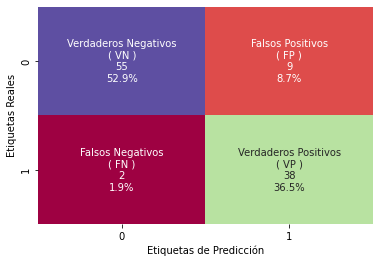

In [143]:
print("Umbral de 0.5")
mi_cm(y_test,pred_bin_05)

Mejor umbral de 0.2


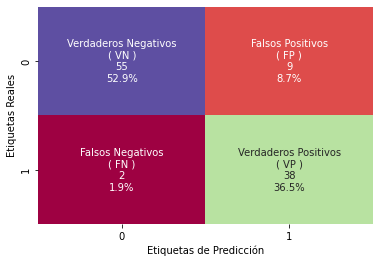

In [144]:
print("Mejor umbral de",new_th)
mi_cm(y_test,pred_bin_newTh)

Modelo con el mejor resultado en f1-score

In [151]:
bestSVCModel = svm.SVC(
    kernel= "poly",
    degree = 4,
    gamma = "scale",
    coef0=0.1,
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
    probability=True
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

score=mi_f1_score(y_test,yhat)
print('F-Score con umbral de 0.5 en el mejor modelo de f1-score: %.5f' % score)

F-Score con umbral de 0.5 en el mejor modelo de f1-score: 0.81481


In [152]:
yhat = best_SVC_pipe.predict_proba(X_test)

probs = yhat[:, 1]

thresholds = np.arange(0, 1, 0.01)

scores = [mi_f1_score(y_test, to_labels(probs, t)) for t in thresholds]

ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.300, F-Score=0.83333


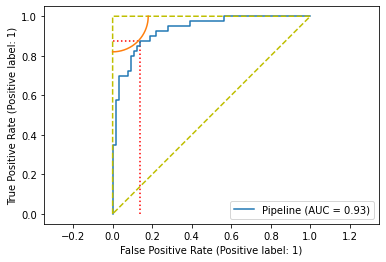

In [153]:
new_th = 0.3 # búsqueda del mejor umbral que minimiza el total FP+FN.
rr = 0.18   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVC_pipe, X_test, y_test)
new_FPrate = fun_thFPrate(new_th, best_SVC_pipe, X_test, y_test)

RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

In [154]:
pred_pr = best_SVC_pipe.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = best_SVC_pipe.predict(X_test)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[56  8]
 [ 7 33]]

Predicciones con un mejor umbral de 0.30:
[[55  9]
 [ 5 35]]


Umbral de 0.5


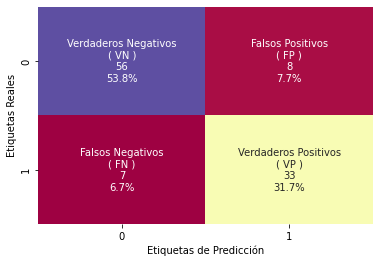

In [155]:
print("Umbral de 0.5")
mi_cm(y_test,pred_bin_05)

Mejor umbral de 0.3


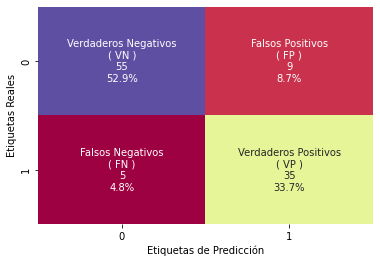

In [156]:
print("Mejor umbral de",new_th)
mi_cm(y_test,pred_bin_newTh)

#**Ejercicio-9.**
Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g-
mean.  

Modelo con el mejor score en accuracy

In [173]:
bestSVCModel = svm.SVC(
    kernel= gridSVC.best_params_.get('svmModel__kernel'),
    degree = gridSVC.best_params_.get('svmModel__degree'),
    gamma = gridSVC.best_params_.get('svmModel__gamma'),
    coef0=gridSVC.best_params_.get('svmModel__coef0'),
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
    probability=True
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

Definimos una función para calcular el g-mean de los modelos 

In [174]:
def mi_gmean(yreal, ypred):

     VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
     gmean = np.sqrt((VP/(VP+FN))*(VN/(FP+VN)))

     return gmean

In [175]:
score=mi_gmean(y_test,yhat)
print('G-mean con threshold de 0.5 en el mejor modelo de accuracy: %.5f' % score)

G-mean con threshold de 0.5 en el mejor modelo de accuracy: 0.84963


In [176]:
# best_SVC_pipe.fit(X_tv, y_tv)
# predict probabilities
yhat = best_SVC_pipe.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Threshold=%.3f, G-mean=%.5f' % (thresholds[ix], gmeans[ix]))

Threshold=0.312, G-mean=0.86715


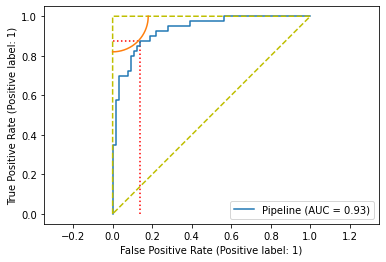

In [177]:
new_th = 0.31 # búsquda del mejor umbral que minimiza el total FP+FN.
rr = 0.18   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVC_pipe, X_test, y_test)
new_FPrate = fun_thFPrate(new_th, best_SVC_pipe, X_test, y_test)

RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

In [178]:
pred_pr = best_SVC_pipe.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = best_SVC_pipe.predict(X_test)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[56  8]
 [ 7 33]]

Predicciones con un mejor umbral de 0.31:
[[55  9]
 [ 5 35]]


Umbral de 0.5


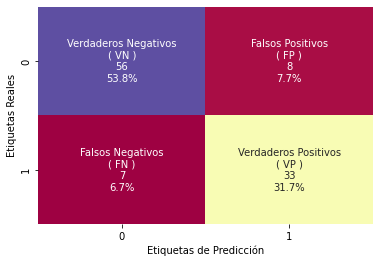

In [179]:
print("Umbral de 0.5")
mi_cm(y_test,pred_bin_05)

Mejor umbral de 0.31


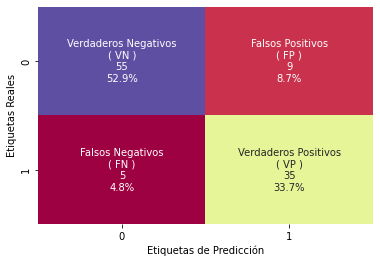

In [180]:
print("Mejor umbral de",new_th)
mi_cm(y_test,pred_bin_newTh)

Modelo con el mejor score en precision

In [310]:
bestSVCModel = svm.SVC(
    kernel= "poly",
    degree = 4,
    gamma = "scale",
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
    coef0=0.5,
    probability=True
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

In [311]:
score=mi_gmean(y_test,yhat)
print('G-mean con threshold de 0.5 en el mejor modelo de precision: %.5f' % score)

G-mean con threshold de 0.5 en el mejor modelo de precision: 0.84963


In [185]:
#obtenemos las probabilidades
yhat = best_SVC_pipe.predict_proba(X_test)
# conservamos probabilidades clase positiva
yhat = yhat[:, 1]
# calculamos las curvas ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
# calculamos el g-mean de cada threshold
gmeans = np.sqrt(tpr * (1-fpr))
# obtenemos el gmean más alto 
ix = np.argmax(gmeans)
print('Threshold=%.3f, G-mean=%.5f' % (thresholds[ix], gmeans[ix]))

Threshold=0.661, G-mean=0.86467


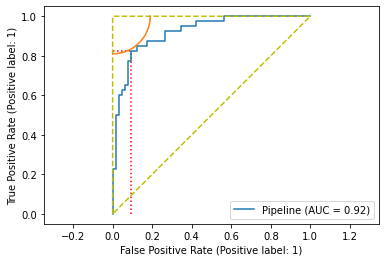

In [189]:
new_th = 0.66 # búsqueda del mejor umbral que minimiza el total FP+FN.
rr = 0.19   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVC_pipe, X_test, y_test)
new_FPrate = fun_thFPrate(new_th, best_SVC_pipe, X_test, y_test)

RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

In [188]:
pred_pr = best_SVC_pipe.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = best_SVC_pipe.predict(X_test)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[56  8]
 [ 7 33]]

Predicciones con un mejor umbral de 0.66:
[[58  6]
 [ 7 33]]


Umbral de 0.5


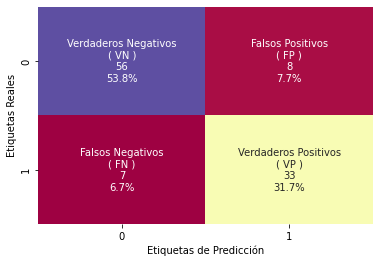

In [190]:
print("Umbral de 0.5")
mi_cm(y_test,pred_bin_05)

Mejor umbral de 0.66


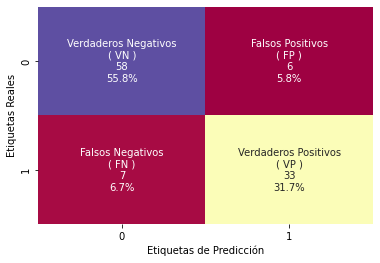

In [191]:
print("Mejor umbral de",new_th)
mi_cm(y_test,pred_bin_newTh)

Modelo con el mejor score en recall

In [286]:
bestSVCModel = svm.SVC(
    kernel= "poly",
    degree = 2,
    gamma = "scale",
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
    coef0=0.5,
    probability=True
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

In [287]:
score=mi_gmean(y_test,yhat)
print('G-mean con threshold de 0.5 en el mejor modelo de recall: %.5f' % score)

G-mean con threshold de 0.5 en el mejor modelo de f1-score: 0.90355


In [288]:
yhat = best_SVC_pipe.predict_proba(X_test)

yhat = yhat[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)

gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)
print('Threshold=%.3f, G-mean=%.5f' % (thresholds[ix], gmeans[ix]))

Threshold=0.405, G-mean=0.90355


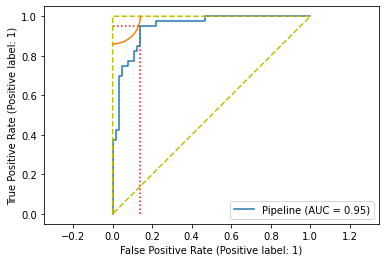

In [289]:
new_th = 0.4 # búsquda del mejor umbral que minimiza el total FP+FN.
rr = 0.14   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVC_pipe, X_test, y_test)
new_FPrate = fun_thFPrate(new_th, best_SVC_pipe, X_test, y_test)

RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

In [290]:
pred_pr = best_SVC_pipe.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = best_SVC_pipe.predict(X_test)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[55  9]
 [ 2 38]]

Predicciones con un mejor umbral de 0.40:
[[55  9]
 [ 2 38]]


Umbral de 0.5


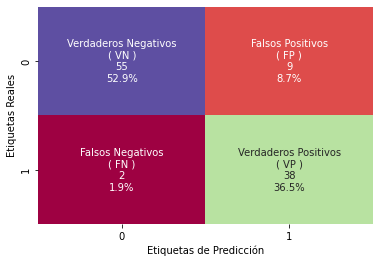

In [291]:
print("Umbral de 0.5")
mi_cm(y_test,pred_bin_05)

Mejor umbral de 0.4


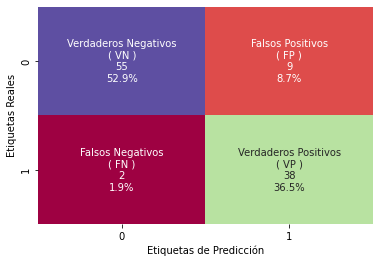

In [292]:
print("Mejor umbral de",new_th)
mi_cm(y_test,pred_bin_newTh)

Modelo con el mejor score en f1-score

In [319]:
bestSVCModel = svm.SVC(
    kernel= "poly",
    degree = 4,
    gamma = "scale",
    random_state= gridSVC.best_params_.get('svmModel__random_state'),
    coef0=0.1,
    probability=True
)

best_SVC_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo",bestSVCModel)])

best_SVC_pipe.fit(X_tv,np.ravel(y_tv))
yhat=best_SVC_pipe.predict(X_test)

In [320]:
score=mi_gmean(y_test,yhat)
print('G-mean con threshold de 0.5 en el mejor modelo de f1-score: %.5f' % score)

G-mean con threshold de 0.5 en el mejor modelo de f1-score: 0.84963


In [321]:
yhat = best_SVC_pipe.predict_proba(X_test)

yhat = yhat[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)

gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)
print('Threshold=%.3f, G-mean=%.5f' % (thresholds[ix], gmeans[ix]))

Threshold=0.312, G-mean=0.86715


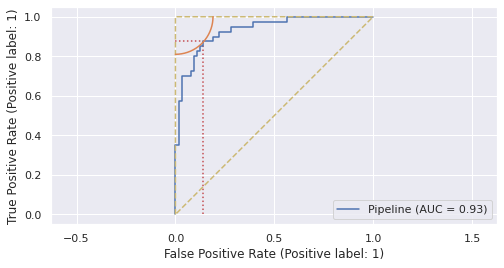

In [322]:
new_th = 0.31 # búsqueda del mejor umbral que minimiza el total FP+FN.
rr = 0.19   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVC_pipe, X_test, y_test)
new_FPrate = fun_thFPrate(new_th, best_SVC_pipe, X_test, y_test)

RocCurveDisplay.from_estimator(best_SVC_pipe, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

In [266]:
pred_pr = best_SVC_pipe.predict_proba(X_test)  # obtenemos primero las predicciones en formato probabilístico de 0 a 1. Este es vector 2D.
pred_pr = pred_pr[:,1]    # como comentamos, es suficiente quedarnos con las probabilidades de la segunda coordenada. Este ya es vector 1D.

# Y realizamos nuestras predicciones a la clase 0 y a la clase 1 con base al mejor umbral new_th encontrado:
pred_bin_newTh = pred_pr > new_th
pred_bin_05 = best_SVC_pipe.predict(X_test)

print('Casos donde FP y FN los consideramos igualmente costosos:\n')
print('Predicciones con el umbral predeterminado 0.5:')
cm05 = confusion_matrix(y_test, pred_bin_05)    # los renglones son los reales y las columnas las predicciones.
print(cm05)

print('\nPredicciones con un mejor umbral de %.2f:' % new_th)
cmTh = confusion_matrix(y_test, pred_bin_newTh)    
print(cmTh)

Casos donde FP y FN los consideramos igualmente costosos:

Predicciones con el umbral predeterminado 0.5:
[[56  8]
 [ 7 33]]

Predicciones con un mejor umbral de 0.31:
[[55  9]
 [ 5 35]]


Umbral de 0.5


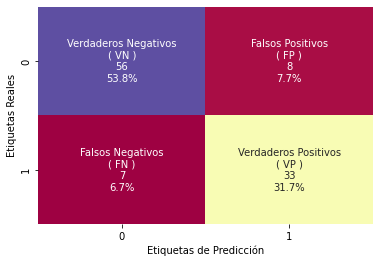

In [267]:
print("Umbral de 0.5")
mi_cm(y_test,pred_bin_05)

Mejor umbral de 0.31


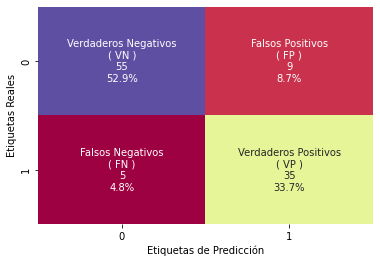

In [268]:
print("Mejor umbral de",new_th)
mi_cm(y_test,pred_bin_newTh)

#**Ejercicio-10.**
Incluye tus conclusiones finales de la actividad.  

<font color="royalblue"> 
* Las máquinas de vectores de soporte al igual que los perceptrones utilizan líneas para separar conjuntos en hiperplanos. De éste modo es dificil separar conjuntos de datos que tengan intersecciones entre ellas. Por lo que usar operaciones para modificar el kernel de la matriz nos ayuda a pasar de un comportamiento lineal a uno exponencial, por mencionar algunos.
* Las estrategias para maximizar el rendimiento del modelo cambian según la métrica que se utilice para evaluarse. Esto se refleja bien con la gráfica de características operativas del receptor (ROC) y su área bajo la curva AUC. aún así en estos modelos no fue una diferencia significativa a diferencia de otros como los random forest.
* Se puede modificar el rendimiento del modelo cambiando los límites opoerativos para dictaminar las clasificaciones, pero es importante recalcar que al incrementar la precisión, la sensibilidad se ve afectada. Por lo que es necesario tener un criterio definido para afinar el modelo sin incumplir los objetivos planteados.
* El mejorar el threshold de los diferentes modelos hace que se cuente con mejores predicciones en la mayoría de los modelos, sólo en el modelo con el mejor recall no se obtuvieron mejores resultados, tanto en la métrica de f1-score como en la de g-mean, el score arrojado con el mejor threshold es el mismo del threshold de 0.5.
</font>

###**Fin de la Actividad de la semana 8.**